<a href="https://colab.research.google.com/github/stazam/M7DataSp---Advanced-data-science-techniques/blob/main/inlineVSquads_worst_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import cv2


from keras.utils import np_utils
from sklearn.model_selection import train_test_split

print(tf.__version__)

2.3.0


#Data uploading from directory

In [2]:
from google.colab import files
uploaded = files.upload()

Saving 111.webp to 111.webp
Saving 113.webp to 113.webp
Saving 114.webp to 114.webp
Saving 115.webp to 115.webp
Saving 116.webp to 116.webp
Saving 117.webp to 117.webp
Saving in1.jpg to in1.jpg
Saving in1.png to in1.png
Saving in2.jpg to in2.jpg
Saving in3.jpg to in3.jpg
Saving in4.jpg to in4.jpg
Saving in5.jpg to in5.jpg
Saving in6.jpeg to in6.jpeg
Saving in7.jpg to in7.jpg
Saving in8.jpg to in8.jpg
Saving in9.jpg to in9.jpg
Saving in10.png to in10.png
Saving in11.jpg to in11.jpg
Saving in12.jpg to in12.jpg
Saving in13.jpg to in13.jpg
Saving in14.jpg to in14.jpg
Saving in15.jpg to in15.jpg
Saving in16.png to in16.png
Saving in17.jpg to in17.jpg
Saving in18.jpg to in18.jpg
Saving in19.jpg to in19.jpg
Saving in20.jpg to in20.jpg
Saving in21.jpg to in21.jpg
Saving in22.jpg to in22.jpg
Saving in23.jpg to in23.jpg
Saving in24.jpeg to in24.jpeg
Saving in25.jpg to in25.jpg
Saving in26.jpg to in26.jpg
Saving in27.jpg to in27.jpg
Saving in28.jpg to in28.jpg
Saving in29.webp to in29.webp
Saving

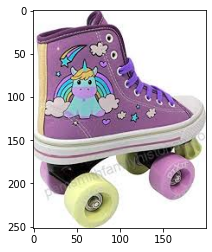

In [3]:
img = cv2.imread('q150.jfif')
plt.imshow(img)

In [58]:
import os 
import cv2
local_download_path = os.path.expanduser('/content/')

labels = []
images = []

for file in os.listdir(local_download_path):

    file_name, file_extension = os.path.splitext(file)
    if (file_extension in ['.png','.jpg']):
       img = cv2.imread(file)
       img = cv2.resize(img,(160,160))     
       images.append(img)

       if file[0] == "q":
           labels.append(0)
       else:
           labels.append(1)

images = np.array(images)
labels = np.array(labels)

In [46]:
print(images.shape)
print(labels.shape)


image = cv2.imread("in1.jpg")
print("Max intensity of pixels is: %d and minimal intensity is: %d " %(image.max(),image.min()))

(262, 160, 160, 3)
(262,)
Max intensity of pixels is: 255 and minimal intensity is: 0 


In [59]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, train_size = 0.8, random_state = 20)

y_train = np.asarray(y_train).astype('float32')
y_test = np.asarray(y_test).astype('float32')

X_train = X_train/255.0
X_test = X_test/255.

In [7]:
y_test

array([1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1.,
       1., 0.], dtype=float32)

In [8]:
from keras.preprocessing.image import ImageDataGenerator
from keras import applications
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers.experimental.preprocessing import Rescaling
from keras.layers import Convolution2D, MaxPooling2D,BatchNormalization
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from keras import optimizers

In [48]:
train_datagen = ImageDataGenerator(
rotation_range=20,
horizontal_flip=True)

In [ ]:
#rescale = Rescaling(1./255., input_shape = (img_size, img_size, 3))

In [60]:
img_size = 160
model = applications.VGG19(weights = "imagenet", include_top=False, input_shape = (img_size, img_size, 3))

top_model = Sequential()

top_model.add(Flatten(input_shape=model.output_shape[1:]))
top_model.add(Dense(128, activation="relu"))
top_model.add(BatchNormalization())
top_model.add(Dropout(0.5))
top_model.add(Dense(1, activation="sigmoid"))

new_model = Sequential() #new model

#new_model.add(rescale)

for layer in model.layers: 
    new_model.add(layer)


new_model.add(top_model)


for layer in model.layers[:21]:
    layer.trainable = False


new_model.compile(loss="binary_crossentropy",
 optimizer= 'rmsprop',
 metrics=["accuracy"])

new_model.summary()


Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 160, 160, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 160, 160, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 80, 80, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 80, 80, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 80, 80, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 40, 40, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 40, 40, 256)     

#Transfer learning

In [61]:
models_data = new_model.fit(train_datagen.flow(X_train, y_train, batch_size=16),epochs=6,validation_data=(X_test,y_test))             


Epoch 1/6
14/14 [==============================] - 1s 96ms/step - loss: 0.3247 - accuracy: 0.8804 - val_loss: 0.5520 - val_accuracy: 0.7736
Epoch 2/6
14/14 [==============================] - 1s 80ms/step - loss: 0.0765 - accuracy: 0.9952 - val_loss: 0.2251 - val_accuracy: 0.8679
Epoch 3/6
14/14 [==============================] - 1s 80ms/step - loss: 0.1068 - accuracy: 0.9522 - val_loss: 0.3891 - val_accuracy: 0.8302
Epoch 4/6
14/14 [==============================] - 1s 81ms/step - loss: 0.1475 - accuracy: 0.9378 - val_loss: 0.3350 - val_accuracy: 0.8302
Epoch 5/6
14/14 [==============================] - 1s 82ms/step - loss: 0.0580 - accuracy: 0.9856 - val_loss: 0.2375 - val_accuracy: 0.8868
Epoch 6/6
14/14 [==============================] - 1s 81ms/step - loss: 0.0756 - accuracy: 0.9713 - val_loss: 0.1760 - val_accuracy: 0.9057


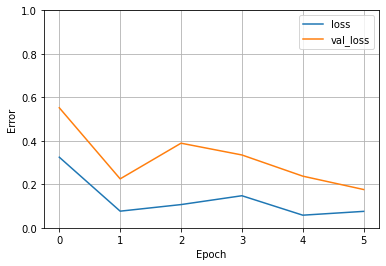

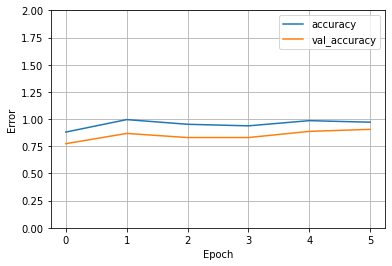

In [62]:
def plot_loss(model):
  plt.figure(1)
  plt.plot(model.history['loss'], label='loss')
  plt.plot(model.history['val_loss'], label='val_loss')
  plt.ylim([0, 1])
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

  plt.figure(2)
  plt.plot(model.history['accuracy'], label='accuracy')
  plt.plot(model.history['val_accuracy'], label='val_accuracy')
  plt.ylim([0, 2])
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)


plot_loss(models_data)

In [63]:
new_model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 160, 160, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 160, 160, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 80, 80, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 80, 80, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 80, 80, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 40, 40, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 40, 40, 256)     

#Fine tunning


In [64]:
for layer in new_model.layers[:21]:
    layer.trainable = True

In [65]:
new_model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 160, 160, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 160, 160, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 80, 80, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 80, 80, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 80, 80, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 40, 40, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 40, 40, 256)     

In [69]:
models_data_fine_tunning = new_model.fit(train_datagen.flow(X_train, y_train, batch_size=16),epochs=1,validation_data=(X_test,y_test))        

14/14 [==============================] - 1s 82ms/step - loss: 0.0641 - accuracy: 0.9761 - val_loss: 0.1359 - val_accuracy: 0.9434


In [70]:
score = new_model.evaluate(X_test, y_test, verbose=0)
print("Loss after fine tunnig is: %f" %(score[0]))
print("Accuracy after fine tunnig is: %f"  %(score[1]))

Loss after fine tunnig is: 0.135878
Accuracy after fine tunnig is: 0.943396


In [95]:
def prediction(file):

  img = cv2.imread(file)
  img = cv2.resize(img,(160,160))
  plt.imshow(img)
  img = img/255
  img = np.expand_dims(img, axis=0)

  prediction = new_model.predict(img)[0,0]
  if prediction < 0.5:
    return "quads"
  else:
    return "inline"


'quads'

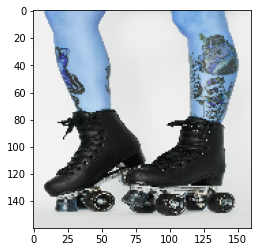

In [102]:
prediction("q121.jpg")



In [ ]:
pip install tensorflowjs

     |████████████████████████████████| 71kB 2.5MB/s 


In [ ]:
import tensorflowjs as tfjs
tfjs.converters.save_keras_model(new_model, "./export_model")

/usr/local/lib/python3.6/dist-packages/tensorflowjs/converters/keras_h5_conversion.py:123: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  return h5py.File(h5file)


In [ ]:
import shutil
shutil.make_archive("export_model", 'zip', "export_model/")

from google.colab import files
files.download('export_model.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Zle zaradené korčule

In [103]:
def prediction_value(file):

  img = cv2.imread(file)
  img = cv2.resize(img,(160,160))
  plt.imshow(img)
  img = img/255
  img = np.expand_dims(img, axis=0)

  prediction = new_model.predict(img)[0,0]
  return prediction

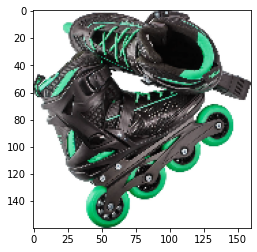

In [118]:
our_predicitons = []
raw_predictions = []

for file in os.listdir(local_download_path):
  file_name, file_extension = os.path.splitext(file)
  if (file_extension in ['.png','.jpg']):
      our_predicitons.append(round(prediction_value(file)))
      raw_predictions.append(prediction_value(file))


In [133]:
(our_predicitons == labels).sum()/262

0.9885496183206107

In [128]:
lb = np.asarray(labels).astype('float32')
rp = np.asarray(raw_predictions).astype('float32')

our_predicitons = np.asarray(raw_predictions).astype('float32')


In [147]:
indexes  = (lb - rp)**2
worst_predictions = np.argsort(-indexes)


lb[worst_predictions] == our_predicitons[worst_predictions]

array([False, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [ ]:

worst_predictions = worst_predictions[0:3]

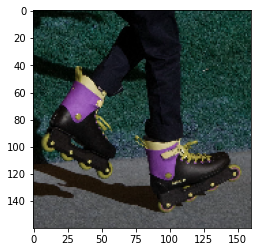

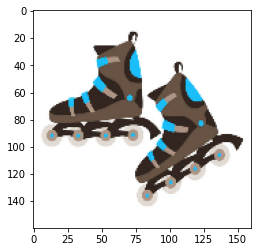

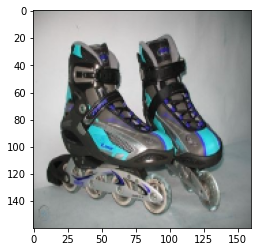

In [145]:
for i in range(1,4):
  plt.figure(i)
  img = images[worst_predictions[i-1],:,:,:]
  plt.imshow(img)
   
 